In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [150]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [151]:
print(X)

[[ 25. 130.  80.  15.  98.  86.]
 [ 35. 140.  90.  13.  98.  70.]
 [ 29.  90.  70.   8. 100.  80.]
 ...
 [ 35.  85.  60.  19.  98.  86.]
 [ 43. 120.  90.  18.  98.  70.]
 [ 32. 120.  65.   6. 101.  76.]]


In [152]:
print(y)

['high risk' 'high risk' 'high risk' ... 'high risk' 'high risk'
 'mid risk']


In [153]:
from sklearn.impute import SimpleImputer
flag = False
for i in df.columns.tolist():
    if ('?' in df[i].tolist() or '' in df[i].tolist()):
        print(f'There are missing values in {i} row, please check it')
        flag = True
print(flag)

False


In [154]:
tmp = df.isnull()
tmp.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [155]:
for i in tmp.columns.tolist():
    print(tmp[i].value_counts())
    print('')

Age
False    1014
Name: count, dtype: int64

SystolicBP
False    1014
Name: count, dtype: int64

DiastolicBP
False    1014
Name: count, dtype: int64

BS
False    1014
Name: count, dtype: int64

BodyTemp
False    1014
Name: count, dtype: int64

HeartRate
False    1014
Name: count, dtype: int64

RiskLevel
False    1014
Name: count, dtype: int64



In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [158]:
print(np.unique(y))

['high risk' 'low risk' 'mid risk']


In [159]:
# for i in range(len(y)):
#     if y[i] == 'high risk':
#         y[i] = 0
#     elif y[i] == 'low risk':
#         y[i] = 1
#     elif y[i] == 'mid risk':
#         y[i] = 2

In [160]:
print(y)

['high risk' 'high risk' 'high risk' ... 'high risk' 'high risk'
 'mid risk']


In [161]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(tol=1e-12, max_iter=10000000, n_jobs=-1, solver='saga', penalty='elasticnet', l1_ratio=0.4)
logisticReg.fit(X, y)
y_pred = logisticReg.predict(X)     

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))         

              precision    recall  f1-score   support

   high risk       0.75      0.73      0.74       272
    low risk       0.64      0.79      0.71       406
    mid risk       0.47      0.34      0.39       336

    accuracy                           0.62      1014
   macro avg       0.62      0.62      0.61      1014
weighted avg       0.61      0.62      0.61      1014



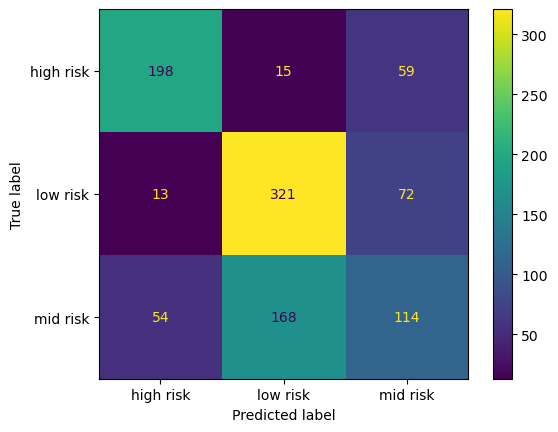

In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred, labels=logisticReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticReg.classes_)
disp.plot()
plt.gca().grid(False)